In [3]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np

/Users/tengliang/opt/anaconda3/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [11]:
df = pd.read_csv('/Users/tengliang/Documents/GitHub/head_shoulder_bots/data/btc_1h_2015_10_08.csv', 
                         parse_dates=['date'],
                         index_col=['date'],
                         header=1
                        )
df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2023-03-11 23:00:00,1678575600000,BTC/USD,20655.30,21249.00,20655.30,21051.13,40.770876,8.582730e+05
2023-03-11 22:00:00,1678572000000,BTC/USD,21097.99,21459.99,20556.70,20655.30,84.363120,1.742546e+06
2023-03-11 21:00:00,1678568400000,BTC/USD,20982.19,21110.83,20880.14,21097.99,9.301693,1.962470e+05
2023-03-11 20:00:00,1678564800000,BTC/USD,20644.43,21173.29,20644.43,20982.19,45.597754,9.567407e+05
2023-03-11 19:00:00,1678561200000,BTC/USD,20962.31,20962.31,20644.43,20644.43,22.135508,4.569749e+05
...,...,...,...,...,...,...,...,...
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02


In [12]:
df = df.rename(columns={'Volume BTC': 'volume'})

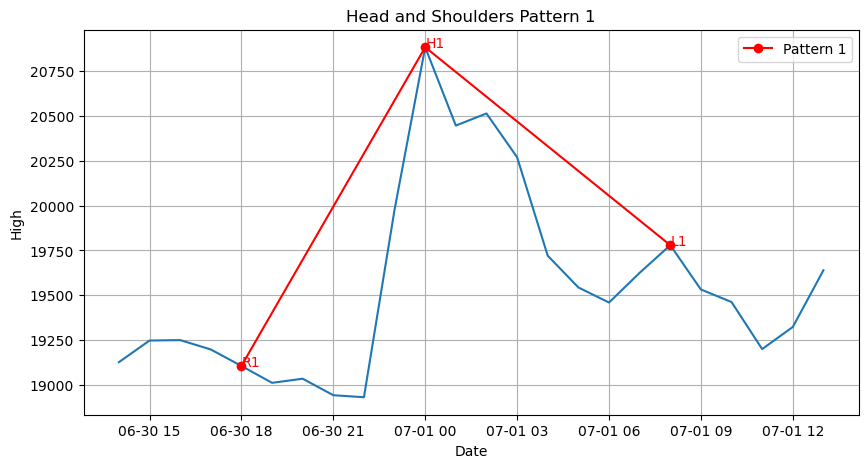

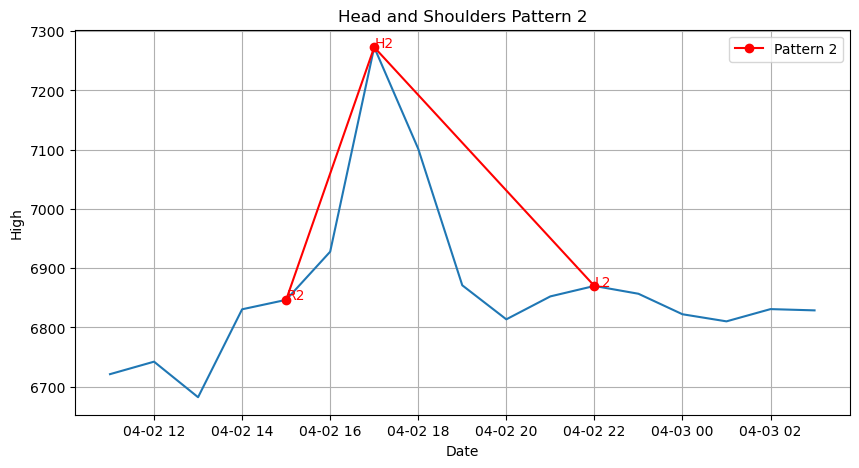

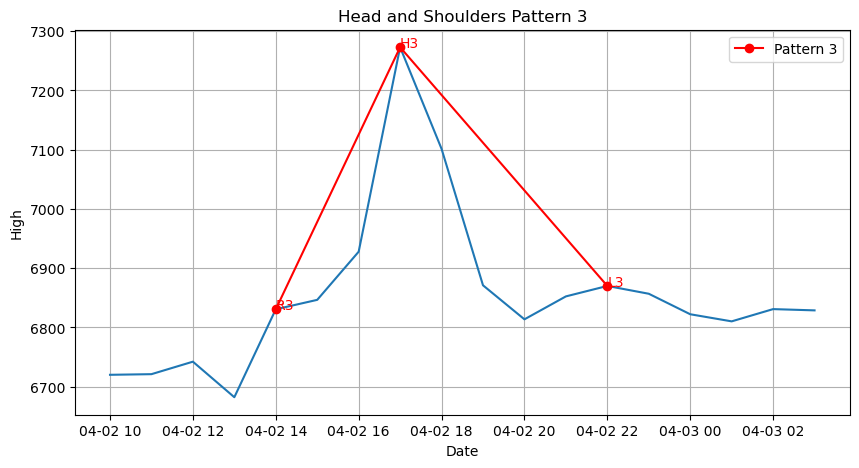

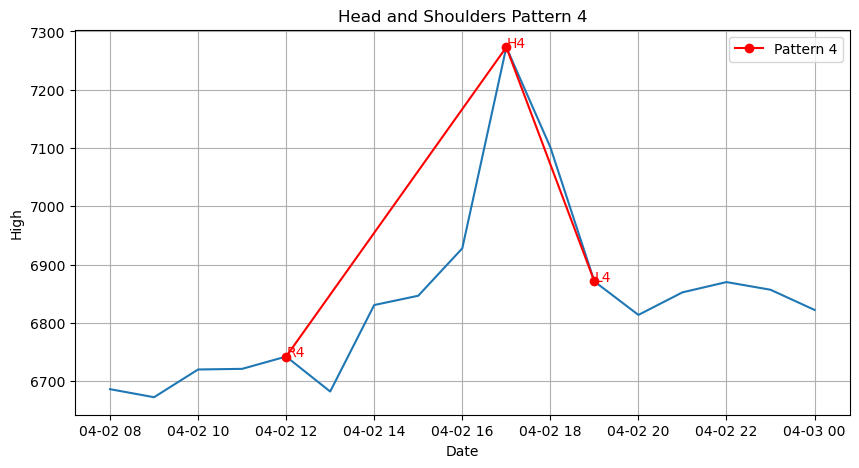

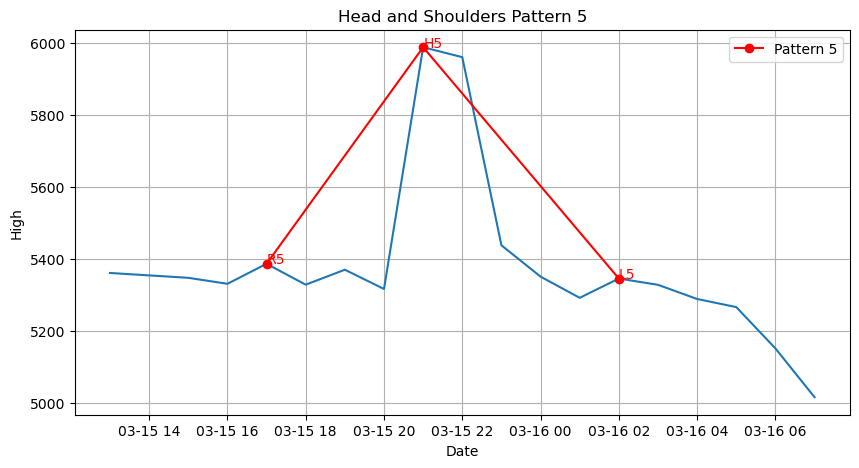

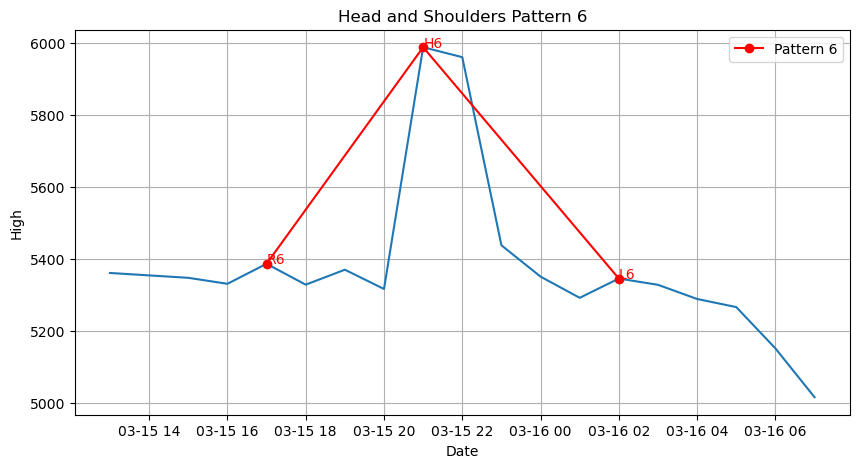

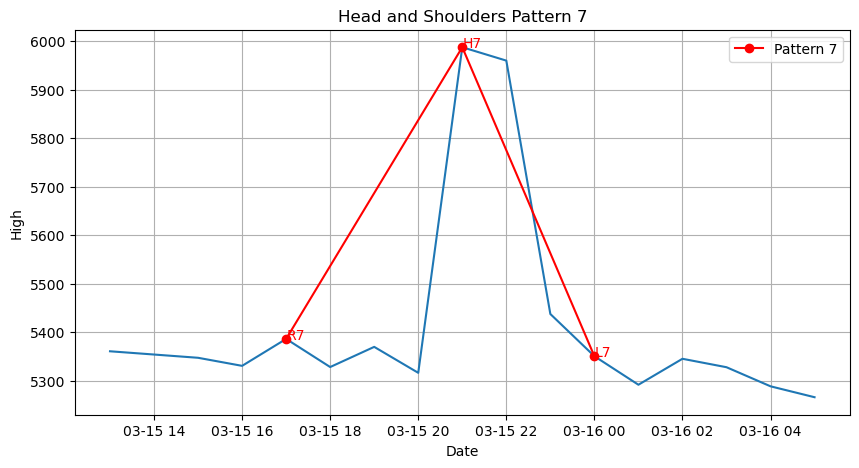

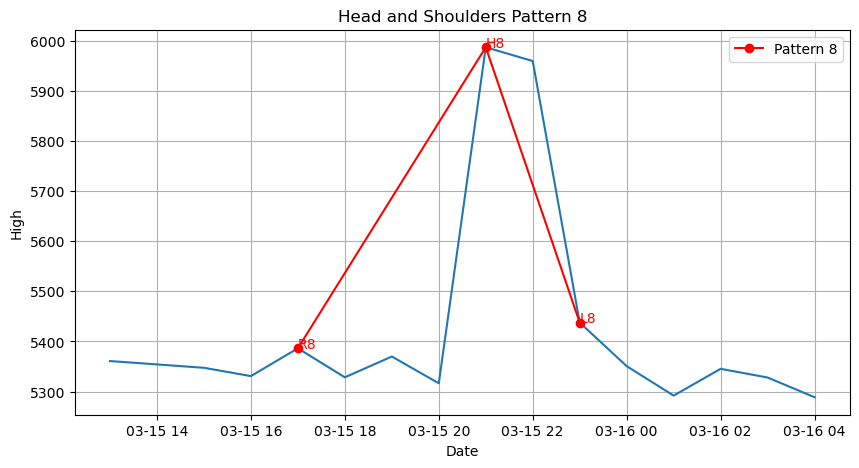

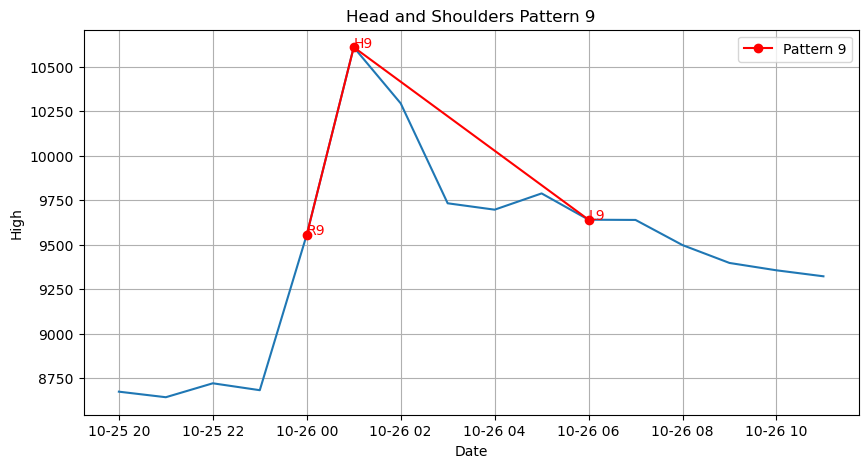

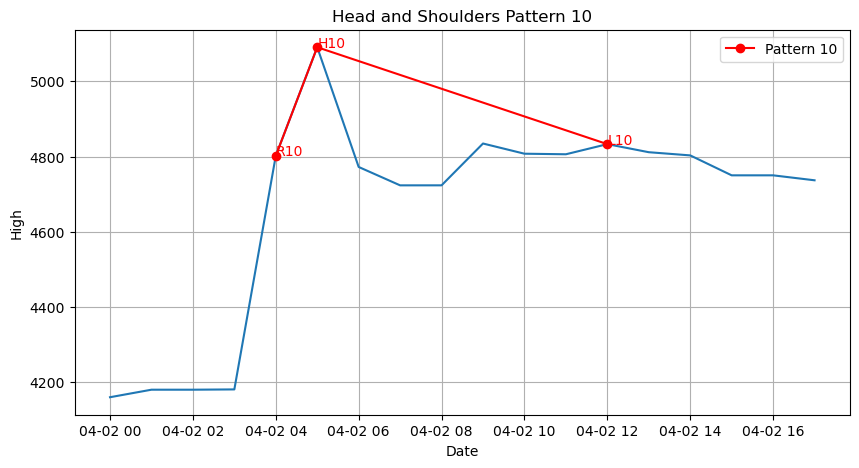

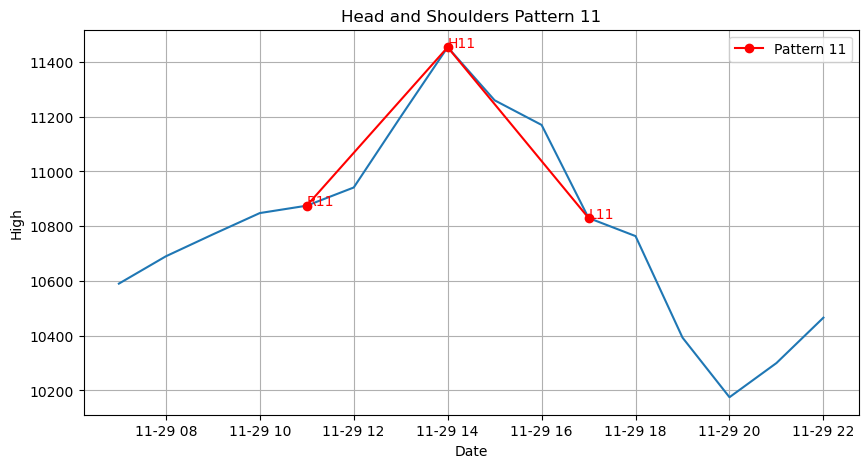

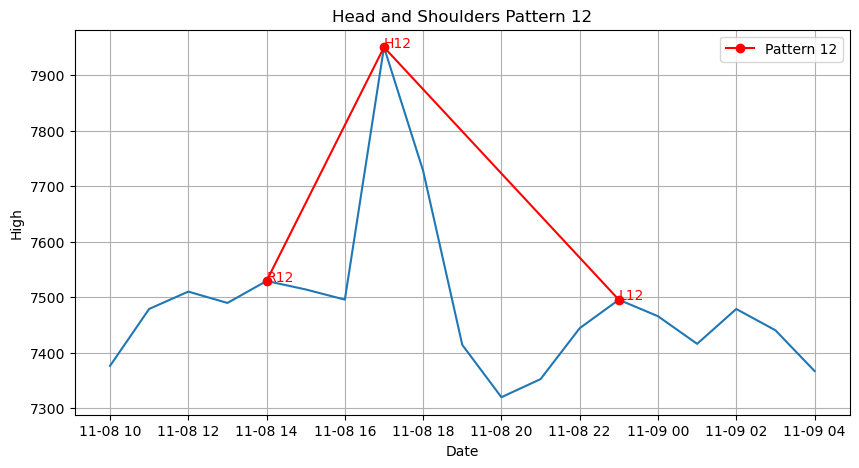

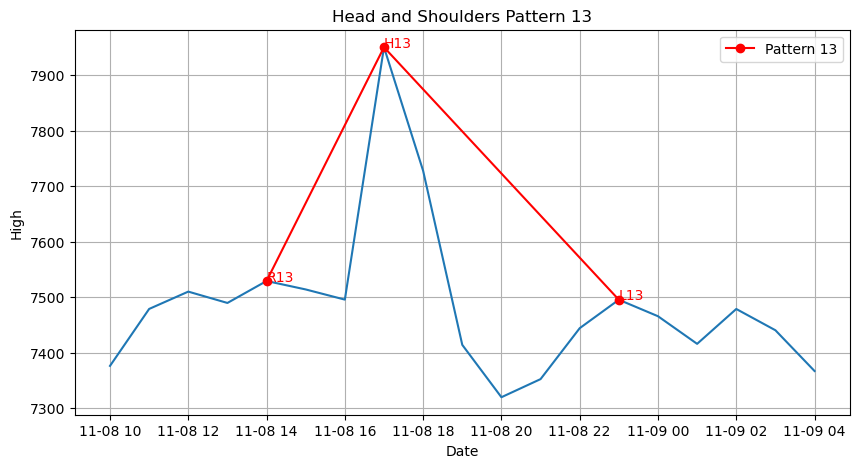

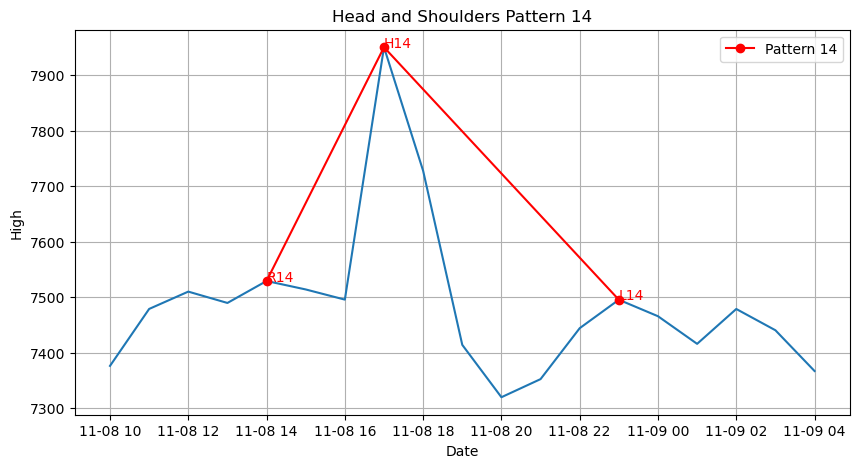

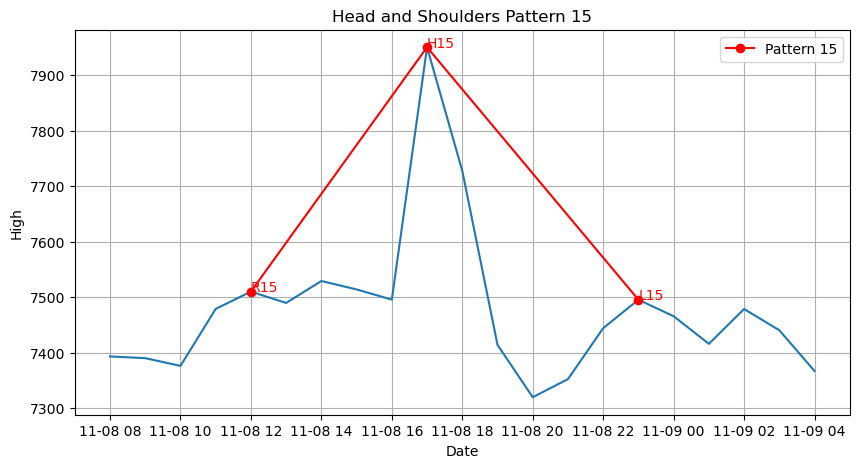

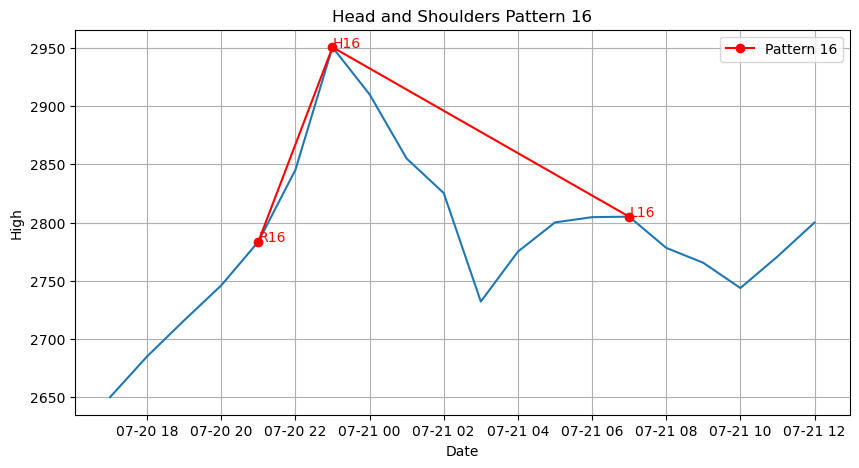

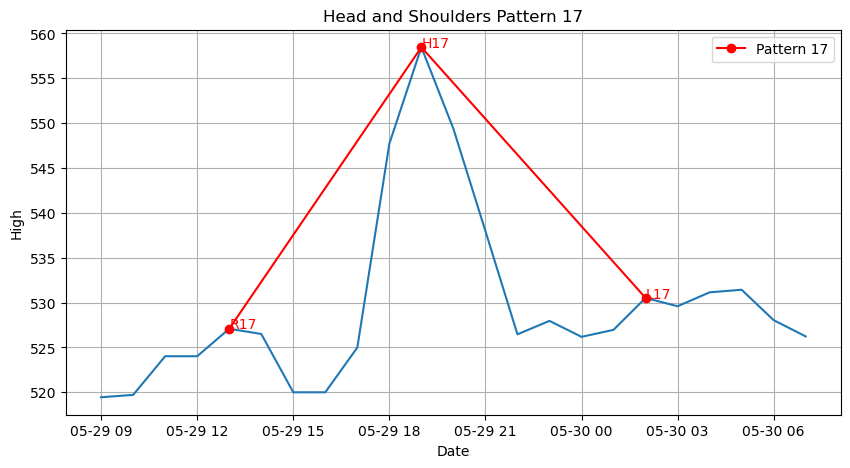

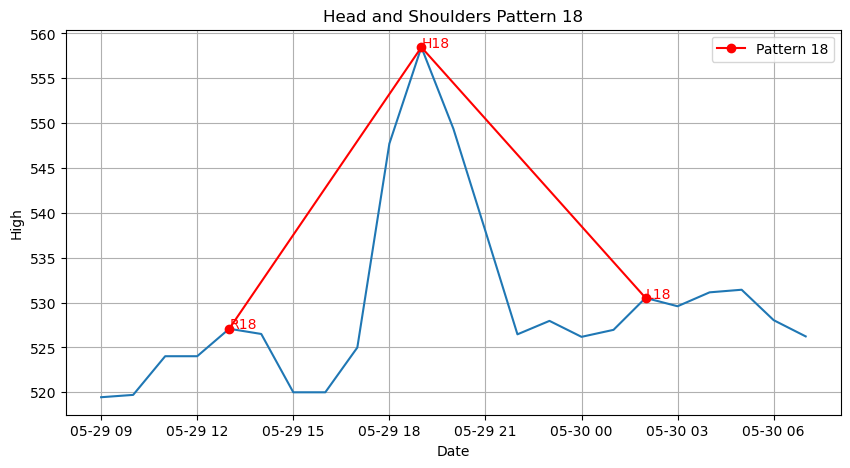

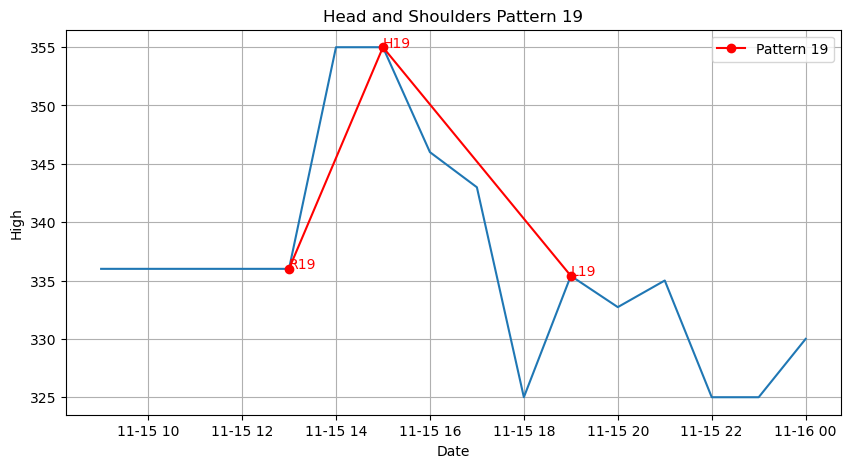

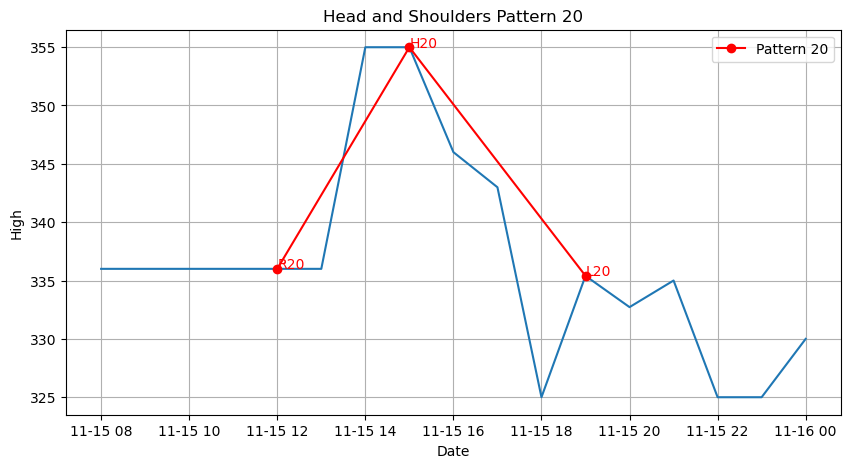

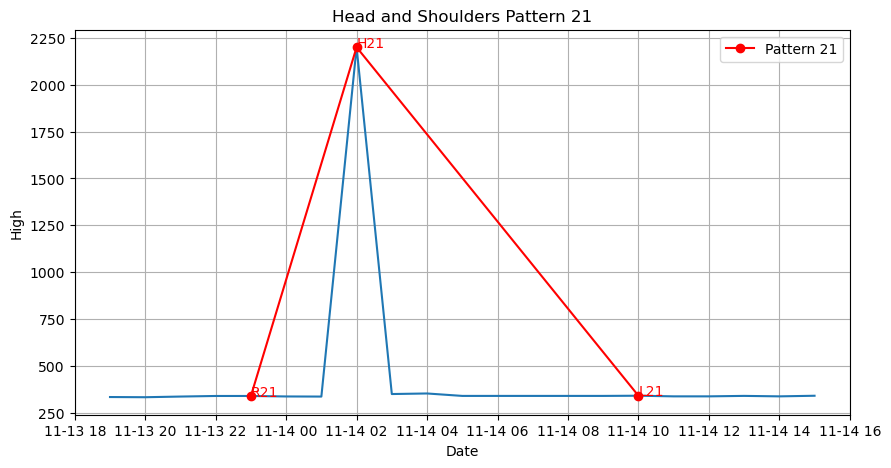

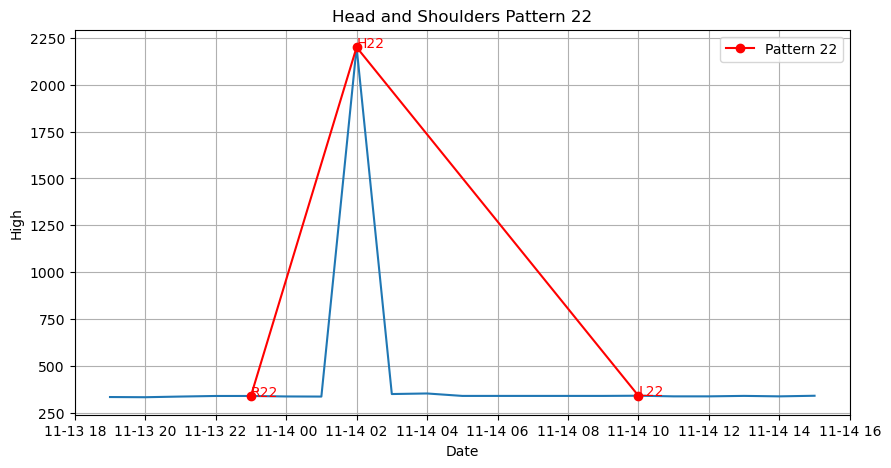

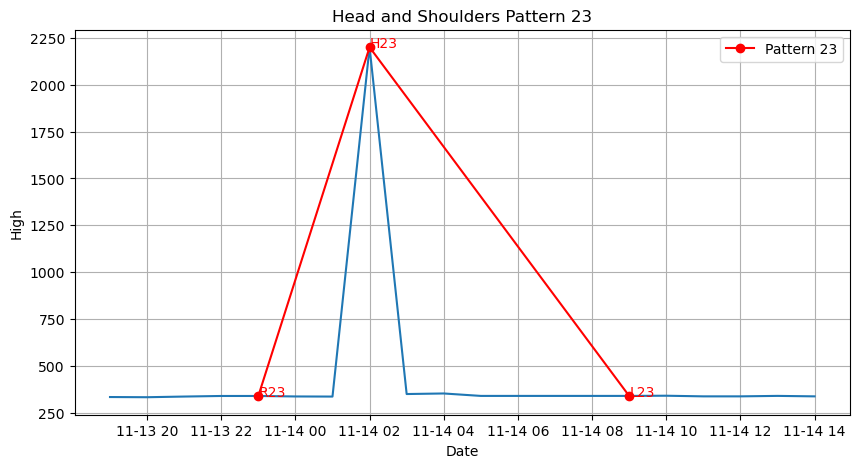

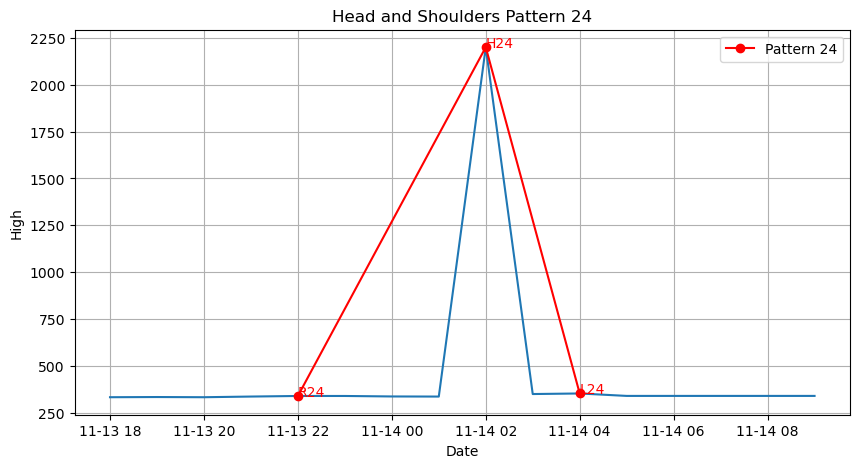

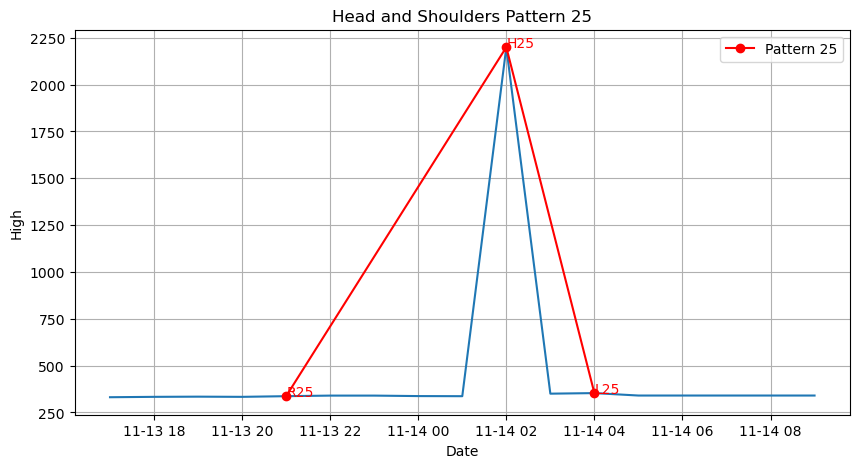

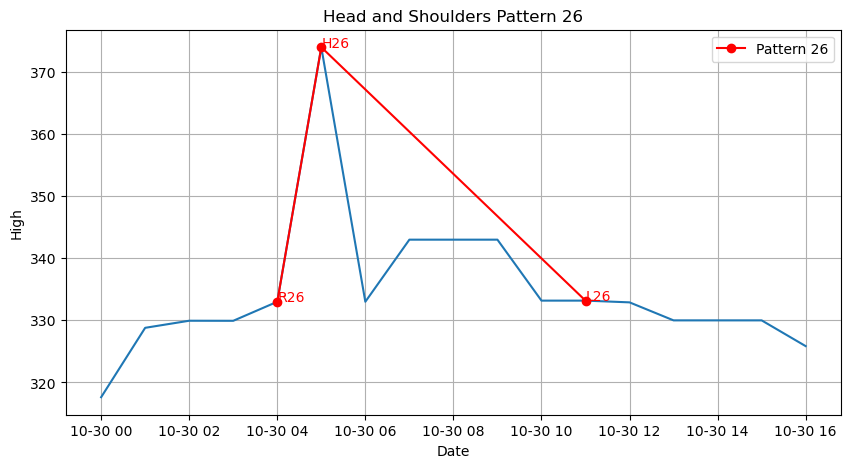

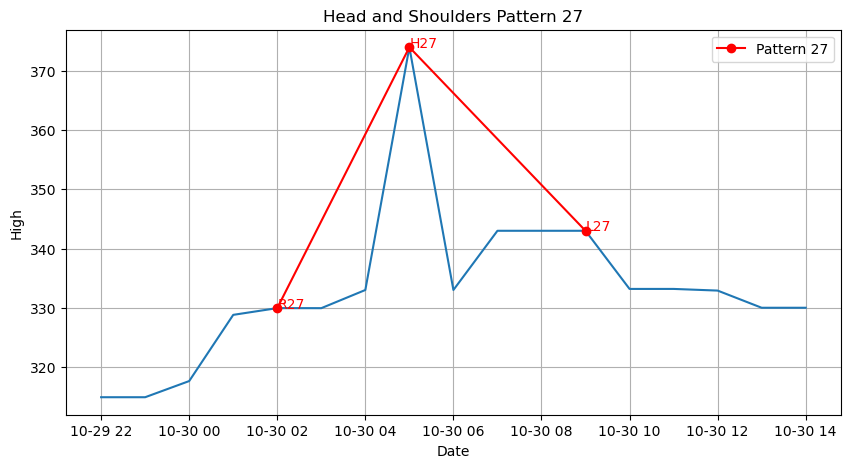

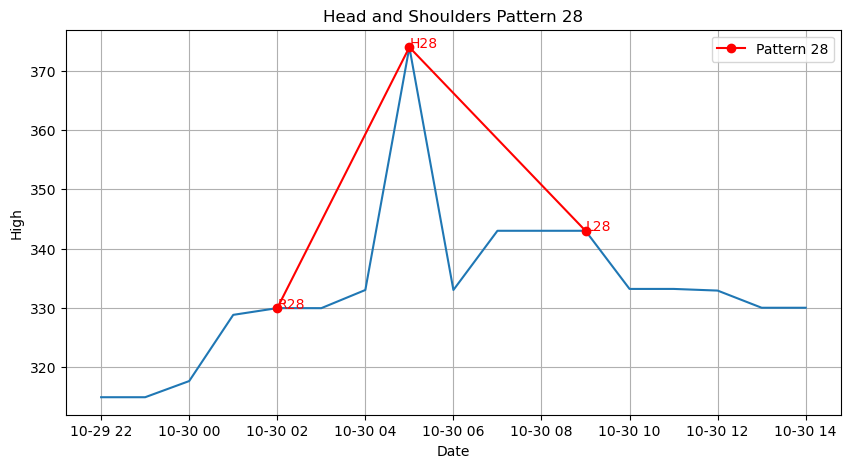

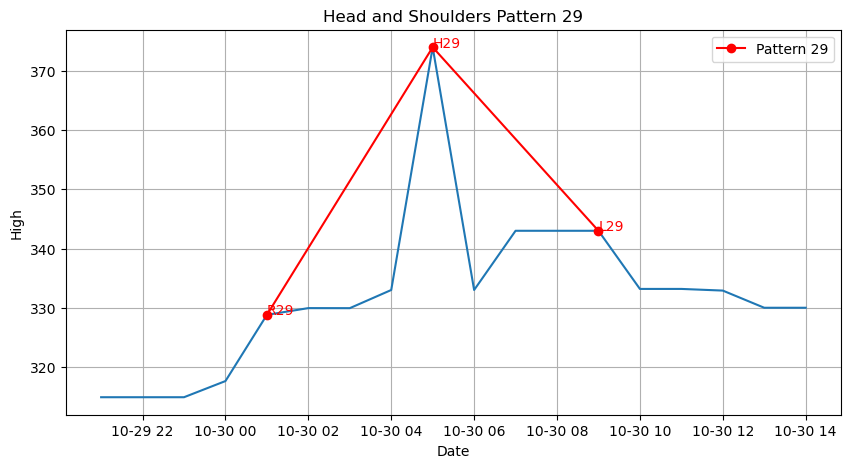

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns: 'open', 'high', 'low', 'close', 'volume'
# Make sure to replace 'your_data.csv' with the path to your actual data file
# df = pd.read_csv('your_data.csv', index_col='date', parse_dates=True)

def find_head_and_shoulders(df, window=5, threshold=0.05):
    patterns = []
    for i in range(window, len(df) - 2 * window):
        left = df['high'][i - window:i]
        middle = df['high'][i:i + window]
        right = df['high'][i + window:i + 2 * window]

        left_highest = left.idxmax()
        middle_highest = middle.idxmax()
        right_highest = right.idxmax()

        left_value = df['high'][left_highest]
        middle_value = df['high'][middle_highest]
        right_value = df['high'][right_highest]

        if (middle_value > left_value * (1 + threshold)) and (middle_value > right_value * (1 + threshold)):
            if (abs(left_value - right_value) / left_value) < threshold:
                patterns.append((left_highest, middle_highest, right_highest))

    return patterns


def plot_head_and_shoulders(df, patterns, window=5):
    n_patterns = len(patterns)
    
    for i, pattern in enumerate(patterns):
        left, head, right = pattern
        start = max(0, df.index.get_loc(left) - window)
        end = min(len(df) - 1, df.index.get_loc(right) + window)

        plt.figure(figsize=(10, 5))
        plt.plot(df.index[start:end], df['high'][start:end])
        plt.plot(df.index[[df.index.get_loc(left), df.index.get_loc(head), df.index.get_loc(right)]],
                 df['high'][[left, head, right]], 'ro-', label=f'Pattern {i+1}')

        # Add annotations
        plt.annotate(f'L{i+1}', (df.index[df.index.get_loc(left)], df['high'][left]), fontsize=10, color='red')
        plt.annotate(f'H{i+1}', (df.index[df.index.get_loc(head)], df['high'][head]), fontsize=10, color='red')
        plt.annotate(f'R{i+1}', (df.index[df.index.get_loc(right)], df['high'][right]), fontsize=10, color='red')

        plt.xlabel('Date')
        plt.ylabel('High')
        plt.title(f'Head and Shoulders Pattern {i+1}')
        plt.legend()
        plt.grid()
        plt.show()


plot_head_and_shoulders(df, patterns)

